# **TAREA: Actividad PBL 1**
Naive Bayes Classifier

**Análisis de métodos de razonamiento e incertidumbre**
Profesor: Daniel Otero Fadul


Integrantes Equipo 4:
* Álvaro López
* Celinna Arellano
* Lolyna de la Fuente
* Luis Gabriel Martínez
* María del Carmen Vargas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problematización**

Los correos electrónicos categorizados como “spam” son aquellos que se mandan en grandes cantidades a millones de cuentas sin haber sido solicitados. La mayoría de estos tienen una finalidad comercial, pueden ser: ventas y publicidad, masivos o avisos de virus (también llamados hoax), enviados mediante virus y phishing. 
La mayoría de los servidores de correos electrónicos tienen un programa que puede reconocer los correos, categorizarlos como “spam” o no spam y automáticamente mandarlos a una bandeja en específico. 
Como se puede imaginar, más allá de ser un correo más a una bandeja, estos correos pueden implicar un riesgo para el usuario pues algunos como los de phishing pueden robar la información del usuario o instalar un virus que puede afectar a su equipo. 
Por esta razón, el objetivo de este escrito y proceso al que hace referencia será encontrar indicadores que permitan la categorización de los correos electrónicos de nuestra base de datos como “spam” o “ham”.


# **Enfoque**

Teniendo en mente este escenario y aprovechando los beneficios que Python puede ofrecer para la resolución de este tipo de problemáticas, lo que se busca dentro de este proyecto es implementar un modelo clasificador estadístico que sea capaz de poder clasificar lo más cercano a lo correcto posible si un email es spam o no es spam. Y para llegar a esta parte del problema, primero hay que llevar a cabo una serie de pasos que vayan pavimentando esta trayectoría hacia la meta. A continuación se describe la estrategia de trabajo dentro de este cuaderno: 

1. Se importan las librerías necesarias, de manera general, se encuentran pandas, numpy, re, matplotlib, seaborn y  nltk. (Más adelante se verán las extensiones utilizadas).


2. Se descarga el dataset de Kaggle con el que se 3. trabajará: ‘spam.csv’ y se formatea a data frame.


3. Limpieza de los datos: primero se checan la cantidad de valores nulos por columna, en segundo se eliminan aquellas que no representen valor, en tercer lugar se renombran por fines prácticos las columnas restantes y finalmente se cambia la columna categórica a una de tipo binario que clasifique con el número 1 los correos spam y 0 los que no lo son. 


4. Visualización de los datos: Con un histograma y un pie chart se puede observar el contraste entre la cantidad de correos spam y no spam, así como sus porcentajes respectivos. Nos permiten darnos una idea más entendible y comprender la magnitud de la situación de esta base de datos. 


5. Procesamiento de texto: Es importante reducir y simplificar la base de datos para obtener un mejor desempeño, para esto, primero se imprime el diccionario de “stopwords” del lenguaje inglés y, para este caso, se agregan “u, ur, urs, urself, 2, 4, n” a este mismo. 
Después, se crea una función que convierte a minúsculas cada mensaje, así como también elimina simultáneamente los caracteres especiales y las palabras “vacías” que son las definidas anteriormente como “stop words”.  Esto último es en donde se eliminan las palabras que son poco representativas para nosotros y que a su vez son palabras muy generales, como lo son para el caso de las conjunciones, preposiciones y verbos muy comunes. 


6. Aplicación de procesamiento PLN “Stemming”, la cual es una heurística que elimina/deriva las últimas partes de una palabra hasta llegar a sufijos y prefijos comunes. Adicionalmente, también se aplicó el procesamiento “Lemmatization”, el cual toma en consideración la gramática y encuentra la raíz de las palabras.


7. Fase de training y testing de los datos en donde separamos el 80% de estos hacía training y el 20% hacía testing de manera aleatoria para poder implementar de manera correcta el modelo clasificador.


8. Creación de función bag of words que calcula la cantidad de palabras que se encuentran por tipo de correo, será de utilidad para calcular sus probabilidades dentro del clasificador. 


9. Creación de la función probability of words utilizando Naive Bayes para cada una de las palabras por cada tipo de correo.


10. Haciendo uso de los datos separados en training y testing, se obtienen las probabilidades de que un correo sea o no spam, así como las probabilidades de que una palabra sea de tipo spam o ham. Adicionalmente, se agregó la columna ‘Length’ para medir el tamaño de los correos categorizados como spam o ham. 


11. Se desarrolla el clasificador probabilístico Maximum A Posteriori (MAP) dentro de una función llamada classify email. 


12. Del grupo de datos resguardados en testing, se aplica el modelo clasificador y se observan las predicciones en una nueva columna.


13. Se evalúa el modelo con métricas tales como confusion matrix, accuracy, precision, recall y F1 score.


14. Se razonan los pasos 12 y 13  en conjunto para llegar a una conclusión final.


# **Propósitos**

El propósito principal del reporte es la generación de un método con uso de conceptos probabilísticos para la asignación de entidades, en forma de cadenas de texto procedientes de correos electrónicos, a las categorías Spam y Ham (No Spam). Esto refiriéndose a la clasificación que se hace en clientes modernos de correo electrónico para filtrar correos no deseados con fines no confiables o comerciales que serían no deseados por los usuarios en un contexto.

Además de tener como propósito principal ello, se tiene como fin secundario el poder demostrar la utilidad de la lógica del teorema de Bayes para su uso en utilidades técnicas de la vida real como, siendo el caso de este reporte la clasificación de correo no deseado.


# **Información**

Los clasificadores ingenuos de Bayes son un algoritmo simple de probabilidad que se basa en que todas las características del modelo son independientes. Por ejemplo, en el caso que se tiene de filtrado de spam, se está asumiendo que todas las palabras que están en el mensaje son independientes entre ellas y no se toma en cuenta el contexto. Este algoritmo lo que busca conseguir es la probabilidad de que cada mensaje sea o no spam. Esto se basa en el modelo matemático de Bayes (Maximum A Posteriori)  el cual consiste de esta forma: 

#### Maximum A Posteriori Model (MAP)
An email is categorized as spam if
 
$$
\begin{align}
P(spam|w_1\cap w_2\cap\cdots\cap w_n) > P(not~spam|w_1\cap w_2\cap\cdots\cap w_n),
\end{align}
$$
 
which is equivalent to
 
$$
\begin{align}
P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam)P(spam) > P(w_1|not~spam)P(w_2|not~spam)\cdots P(w_n|not~spam)P(not~spam).
\end{align}
$$
 
Notice that it is not necessary to calculate $P(w_1\cap w_2\cap\cdots\cap w_n)$. For classifying emails we will employ this method.


Para la implementación del algoritmo se hizo referencia a la guía paso a paso publicada por Towards Data Science, la cual muestra primero una breve explicación del funcionamiento del algoritmo. Después nos muestra 4 pasos simples: 
1. La limpieza de la base de datos 

2. La preparación de los datos 

3. La implementación 

4. Los resultados

Por otro lado, también se tomó en consideración el artículo “Laplace smoothing in Naïve Bayes algorithm” publicado por Towards Data Science, en el que se menciona el escenario en donde una palabra no forme parte del dataset contenido dentro del training set. En ese caso, no hay un “likelyhood” para esa palabra, entonces, dicho artículo da a conocer diversos acercamientos para resolverlos, entre ellos ignorar el término o encontrarse con el problema de la probabilidad de cero, generando un caos. Esto último se menciona ya que se intentó implementar la segunda opción y lo que ocasionó fue tomar dichas probabilidades como cero y asignar muchos falsos negativos que se vieron reflejados dentro de la matriz de confusión.

Se tomó la iniciativa de no tomar en cuenta aquellos términos que no se encuentren dentro del training set y, desde otro punto de vista, se implementó la resolución de otro escenario en el que en esta ocasión exista la misma probabilidad de ser o no spam para el mismo correo, y para solucionarlo se compararon las longitudes del promedio de ambos tipos de correo con respecto el correo que se está tratando de clasificar, y seleccionar bajo cierta condición implementada dentro del código si se clasifica como spam o ham. 


# **Razonamiento**

# Razonamiento e intuición de Texto:

Como ya se sabe los correos electrónicos están compuestos de cadenas de texto que deben ser procesadas de manera que puedan ser usadas para los métodos probabilísticos de teorema de Bayes del clasificador Naive Bayes. Primero que nada, para la ejecución del proceso de preparación de los datos, se cargan los contenidos de correos electrónicos ya anteriormente clasificados. Los contenidos que se toman en cuenta para esto son: contenido de texto del correo y clasificación en forma de “spam” y “ham”. Es decir, los datos van en forma de tabla donde en una columna se encuentran los contenidos de texto de todo un correo y su clasificación por registro.
Por motivos de errores de carga de datos y limpieza, se tuvieron que borrar unas columnas sin datos llamadas “unnamed” y cambiar los nombres de las columnas restantes. Además de ello, también se decidió por hacer una transformación de las etiquetas de clases “spam” y “ham” a etiquetas binarias con 1 y 0 respectivamente. 


In [2]:
# Importamos Librerías
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

from nltk.stem import PorterStemmer,  WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Acerca de la base de datos:

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

# Lectura y Limpieza de Datos

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/spam.csv', encoding= 'latin-1')
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
#Checamos por valores nulos
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Nos damos cuenta que las columnas de unnamed tienen más del 95% de sus filas con valores nulos, por lo que decidimos borrarlas.

In [6]:
#Borramos las columnas
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
#Llamamos las columnas por otros nombres más convenientes
data = data.rename(columns={'v1': 'Type', 'v2': 'Message'})
data.head(10)

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
'''Podemos hacer una nueva columna con variable binaria 
acerca del tipo de correo y borramos la de tipo categórica'''

data['Spam'] = data['Type'].map({'ham' : 0, 'spam' : 1})
data = data.drop(['Type'], axis = 1)
data.head(10)

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


Finalmente, para la exploración de los datos cargados ya limpios, se visualizó la proporción de registros que son los que se muestran a continuación:

Number of emails:  5572
Number of NO SPAM emails:  4825
Number of SPAM emails:  747


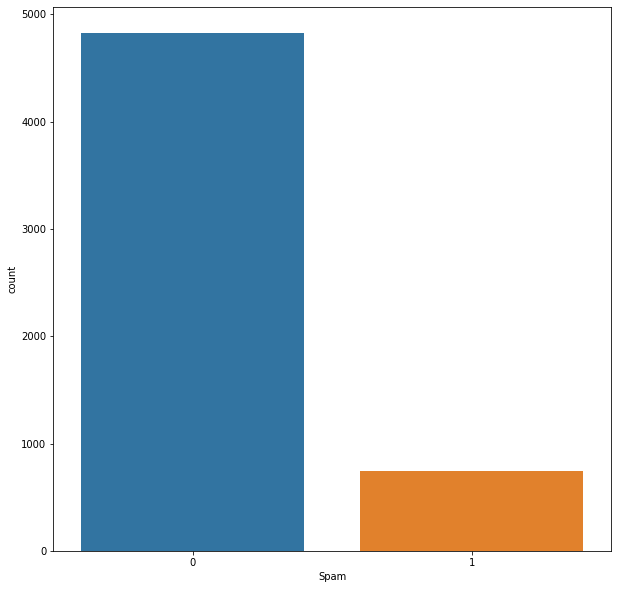

<Figure size 720x720 with 0 Axes>

In [9]:
plt.figure(figsize=(10,10))

x= data.Spam.value_counts()
sns.countplot(x= "Spam", data = data)

plt.figure(figsize=(10,10))

count = data['Spam']

ham = (count == 0).sum()
spam = (count == 1).sum()

print('Number of emails: ', len(count))
print('Number of NO SPAM emails: ', ham)
print('Number of SPAM emails: ', spam)


SPAM Total: 747. Percentage : 13.41%
NO SPAM Total: 4825. Percentage : 86.59%


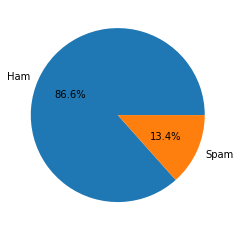

In [10]:
print(f'SPAM Total: {spam}. Percentage : {round(100*spam/count.shape[0],2)}%')     
print(f'NO SPAM Total: {ham}. Percentage : {round(100*ham/count.shape[0],2)}%')   

labels = ["Ham","Spam"]

plt.pie(x.values, labels= labels, autopct= "%1.1f%%") # visualizing using pie
plt.show()   

# Procesamiento del Texto

Antes de aplicar el clasificador se necesita simplificar el texto lo más posible para su procesamiento. Es por eso que se creó una función para hacer esto, esta función pasa todo el texto a minúsculas, después se eliminaron los caracteres especiales, los cuales son los signos de puntuación y por último se quitaron las palabras vacías. 


## Palabras vacías


In [11]:
#Imprimos el diccionario de stop words
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Las palabras vacías o ‘stopwords’ se pueden considerar artículos y/o preposiciones las cuales no agregan valor alguno a los mensajes, para esto se usó la librería nltk y se descargó el corpus de stopwords. Se utilizó el corpus de stopwords en inglés ya que toda la base está en ese idioma. Además, se optó por agregar más palabras vacías las cuales se consideran importantes ya que son frases cotidianas que no estaban incluídas como ‘2’ en vez de ‘to’ o ‘4’ en vez de ‘for’, entre otras. 


In [12]:
#Agregamos más palabras vacías
stop_words.append('u') #you
stop_words.append('ur') #your
stop_words.append('urs') #yours
stop_words.append('urself') #yourself
stop_words.append('2') # to
stop_words.append('4') # for
stop_words.append('n') # and

Se utilizó el método .lower() para pasar todo a minúsculas, después se utilizó la librería ya descargada re la cuál hace operaciones de expresiones regulares. Se utilizó el re.sub con los parámetros en default para quitar los caracteres especiales. Por último, al haber hecho una ‘tokenización’ ya que se utilizó el método .split() para separar las oraciones, la función regresa solamente las palabras que no se encuentren en el corpus de palabras vacías (el cuál se mencionó anteriormente). Entonces la función regresa palabras en minúsculas, separadas y libres de caracteres especiales. 

In [13]:
#Hacemos una función para limpiar el texto
def clean_data(text):
    text = text.lower() #Pasa a minúsculas
    text = re.sub('[^a-zA-Z0-9_]+', ' ', text) #Quita carácteres especiales
    return [word for word in text.split() if word not in stop_words]  #Quita las palabras vacías

In [14]:
data['Message'] = data['Message'].apply(clean_data)
data.head(10)

,Message,Spam
0,"[go, jurong, point, crazy, available, bugis, g...",0
1,"[ok, lar, joking, wif, oni]",0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,"[dun, say, early, hor, c, already, say]",0
4,"[nah, think, goes, usf, lives, around, though]",0
5,"[freemsg, hey, darling, 3, week, word, back, l...",1
6,"[even, brother, like, speak, treat, like, aids...",0
7,"[per, request, melle, melle, oru, minnaminungi...",0
8,"[winner, valued, network, customer, selected, ...",1
9,"[mobile, 11, months, r, entitled, update, late...",1


In [15]:
data['Message'].iloc[2]

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18']

Cuando ya se tuvo esta nueva base, se terminó con la ‘stemización’ o derivación de palabras a su núcleo. Este proceso cambia todas las variantes de una palabra a su núcleo entonces por ejemplo, la palabra vehículos la cambiaría a vehículo. Para esto, se utilizó PorterStemmer() el cual es una función de ntlk.stem, entonces se usó esa función para derivar las palabras restantes de la base a su núcleo, y con eso se completa el procesamiento del texto. Por último, se decidió ‘lematizar’ el texto. Esto significa que cualquier variante del verbo raíz se cambió a su verbo raíz. Esto no afectó mucho los resultados como se esperaba, pero sí lo suficiente para que se decidiera implementar con este proceso.


Derivamos las palabras usando PorterStemmer() y WordNetLemmatizer()

In [16]:
from nltk.corpus import wordnet
Porter = PorterStemmer()
Lemma = WordNetLemmatizer()
nltk.download('wordnet')

data['Message'] = data['Message'].apply(lambda x : [Porter.stem(word) for word in x])
data['Message'] = data['Message'].apply(lambda x : [Lemma.lemmatize(word, wordnet.VERB) for word in x])
data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Message,Spam
0,"[go, jurong, point, crazi, avail, bugi, great,...",0
1,"[ok, lar, joke, wif, oni]",0
2,"[free, entri, wkli, comp, win, fa, cup, final,...",1
3,"[dun, say, earli, hor, c, alreadi, say]",0
4,"[nah, think, goe, usf, live, around, though]",0
...,...,...
5567,"[2nd, time, tri, contact, 750, pound, prize, c...",1
5568,"[_, b, go, esplanad, fr, home]",0
5569,"[piti, mood, suggest]",0
5570,"[guy, bitch, act, like, interest, buy, someth,...",0


In [17]:
data['Message'].iloc[2]

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18']

# Desarrollo del clasificador

Se dividen los datos en datasets de training y testing.

In [18]:
np.random.seed(298347) 
number_of_rows = data.shape[0]
index_train = np.random.choice(range(number_of_rows), int(0.8 * number_of_rows), replace=False)
index_test = np.asarray(list(set(range(number_of_rows)) - set(index_train)))
train_set = data.iloc[index_train] 
test_set = data.iloc[index_test] 
print(train_set.shape)
print(test_set.shape)

(4457, 2)
(1115, 2)


Con esta función podemos calcular cuántas palabras se encuentran por tipo de correo, también cuántas veces se repiten estas palabras:

In [19]:
def bag_of_words(corpus): 
    bag_of_words = {}
    
    for email in corpus:
        for word in email:
            if word not in bag_of_words:
                bag_of_words[word] = 1
            else:
                bag_of_words[word] += 1
    
    return bag_of_words

Aquí se usa Naïve Bayes para calcular la probabilidad de cada una de las palabras dependiendo de el dataset en el que se encuentren (Spam o Ham):

In [20]:
def probability_words(df): 
    
    all_words = bag_of_words(train_set["Message"])
    baggie_of_words = bag_of_words(df["Message"])
    alpha = 1 #Este se puede cambiar para obtener diferentes resultados

    number_of_words = df['Message'].apply(len).sum()
    
    probability_words = {}
    
    for word, pw in baggie_of_words.items():
        probability_words[word] = (pw + alpha)/(number_of_words + alpha * len(all_words))
    
    return probability_words

Calculamos las probabilidades de los elementos que se usan en el clasificador de Naïve Bayes, con respecto a la siguiente imagen: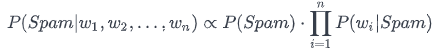

Donde P(Spam) = p_spam y todas las probabilidades condicionales de las palabras se encuentran en el diccionario de probability_spam_words.

Se hace lo mismo para los correos que no son spam, esto con el fin de usar el *Maximum A Posteriori Model* (MAP) para clasificar los correos.


In [21]:
p_spam = train_set[train_set['Spam'] == 1].shape[0] / train_set.shape[0]
p_not_spam = train_set[train_set['Spam'] == 0].shape[0] / train_set.shape[0]
probability_spam_words = probability_words(train_set[train_set['Spam'] == 1])
probability_non_spam_words = probability_words(train_set[train_set['Spam'] == 0])

In [22]:
train_set["lenght"] = train_set["Message"].apply(len)
average_spam_len = train_set[train_set["Spam"] == 1]["lenght"].sum() / len(train_set[train_set["Spam"] == 1])
average_non_spam_len = train_set[train_set["Spam"] == 0]["lenght"].sum() / len(train_set[train_set["Spam"] == 0])
train_set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Message,Spam,lenght
4037,"[hope, scare]",0,2
4255,"[aah, cuddl, would, lush, need, lot, tea, soup...",0,10
320,"[merri, christma, babe, love, ya, kiss]",0,6
416,"[alright, new, goal]",0,3
4870,"[well, know, mean, text]",0,4
...,...,...,...
1779,"[loan, purpos, 500, 75, 000, homeown, tenant, ...",1,19
2256,"[check, head, drop, stuff]",0,4
1384,"[storm, msg, wen, lift, phne, say, hello, knw,...",0,30
3778,"[claim, 200, shop, spree, call, 08717895698, m...",1,7


Para la clasificación de los correos, tomamos en cuenta que puede haber muchas palabras que no se encuentren dentro de nuestra base de conocimiento, por lo que tomamos la desición de ignorarlas en el caso de que no se encuentren en alguno de los diccionarios de probabilidades. En el caso de que tuvieramos un mail que tuviera la misma probabilidad tanto para SPAM como para HAM, usamos la longitud del correo como segundo factor, se calcula la distancia de la longitud del correo a clasificar con respecto al promedio de longitud de los correos de SPAM y HAM y se selecciona el que tenga la menor distancia.

In [23]:
def classify_email(email):
    
    likelihood_spam = 1
    likelihood_non_spam = 1
    
    for word in email:
      if word in probability_non_spam_words and word in probability_spam_words:
        likelihood_spam *= probability_spam_words[word]
        likelihood_non_spam *= probability_non_spam_words[word]
    
    likelihood_spam *= p_spam
    likelihood_non_spam *= p_not_spam

    if likelihood_spam > likelihood_non_spam:
        return 1
    elif likelihood_spam < likelihood_non_spam:
        return 0
    else:
      print(likelihood_non_spam)
      if abs(len(email) - average_spam_len) > abs(len(email) - average_non_spam_len):
        return 1
      else:
        return 0

In [24]:
test_set['Prediction'] = test_set['Message'].apply(lambda x : classify_email(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Predicción del modelo

In [25]:
test_set

,Message,Spam,Prediction
0,"[go, jurong, point, crazi, avail, bugi, great,...",0,0
4099,"[home, lei]",0,0
2052,"[call, 09094100151, use, min, call, cast, 10p,...",1,1
4103,"[hav, frnd, name, ashwini, colleg]",0,0
12,"[urgent, 1, week, free, membership, 100, 000, ...",1,1
...,...,...,...
2027,"[get, new, job, bar, airport, satsgettin, 47pe...",0,0
2034,"[avatar, suppos, subtoitl]",0,0
4082,"[good, afternoon, love, good, see, word, ym, g...",0,0
4085,"[lemm, know]",0,0


# **Conclusión**

Para medir el desempeño de nuestro algoritmo se creó una matriz de confusión. Esta consiste en una tabla que compara los resultados obtenidos en una muestra de los datos contra los valores verdaderos. Tenemos las siguientes categorías: 
* Verdaderos Positivos: los valores que el programa marcó como positivos y son positivos (en este caso que son marcados como spam)
* Verdaderos Negativos:  los que son marcados como ham y efectivamente no son spam
* Falsos Positivos: los que son marcados como positivos (spam) pero realmente no lo son. 
* Falsos Negativos: los que son marcados como ham pero en realidad sí son spam. 


Con esta función hacemos la evaluación del modelo. Se hace una tabla de confusión y una tabla de métricas:

In [26]:
def performance_metrics(df):
    positives = [len(test_set[(test_set["Prediction"] == 1) & (test_set["Spam"] == 1)]),
                 len(test_set[(test_set["Prediction"] == 1) & (test_set["Spam"] == 0)])]
    negatives = [len(test_set[(test_set["Prediction"] == 0) & (test_set["Spam"] == 1)]),
                 len(test_set[(test_set["Prediction"] == 0) & (test_set["Spam"] == 0)])]
    conf_mat = pd.DataFrame({"Predicted positives" : positives,
                             "Predicted negatives" : negatives},
                           index = ["Actual positives", "Actual negatives"])
    
    accuracy = (positives[0] + negatives[1])/len(df)
    precision = positives[0]/sum(positives)
    recall = positives[0]/(positives[0] + negatives[0])
    f1 = 2 * (precision * recall)/(precision + recall)
    
    metrics = pd.DataFrame({"Metrics" : [accuracy, precision, recall, f1]}, 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"])
    return [conf_mat, metrics]

In [27]:
confusion_matrix, metrics = performance_metrics(test_set)
confusion_matrix

,Predicted positives,Predicted negatives
Actual positives,144,19
Actual negatives,19,933


Como se puede observar en la matriz de confusión tenemos predicted positives y predicted negatives en la parte superior, mientras que en la lateral tenemos actual positives y actual negatives, por lo que el cuadrante [1,1] nos dirá el valor de verdaderos positivos. En este caso se tienen 144 verdaderos positivos. Después, en el cuadrante [1,2] se tienen los que el programa predijo como negativos que en realidad eran positivos (falsos negativos), para esta métrica se tienen 19 casos. Por otro lado, en el cuadrante [2,1] se tienen los falsos positivos los cuales son el número de correos que fueron categorizados como spam cuando realmente no lo eran, el número total de estos casos es de 19. Finalmente, en el cuadrante [2,2] se tienen los verdaderos negativos, que son los correos que no son spam y que el clasificador marcó como no spam, en este caso tenemos 933. 

Al ver estos valores se puede inferir que el desempeño del programa es bueno pues “errores” tuvo solo 38, sin embargo, para tener una mejor imagen de qué tan bueno es el programa se tienen que sacar más métricas que ayuden a visualizarlo. 


Las siguientes métricas también cuantifican el comportamiento del modelo, pero de una forma distinta. 


In [28]:
metrics

,Metrics
Accuracy,0.965919
Precision,0.883436
Recall,0.883436
F1 Score,0.883436


La métrica **Accuracy** mide el número de clasificaciones correctas sobre el total del número de casos de prueba. Tal vez esta métrica no sea un buen punto de partida para evaluar el modelo ya que se “influencia” mucho, es decir, puede inclinarse hacia un bias. Eso puede suceder dentro de datos desbalanceados. Esta métrica dio 0.96, da “buen resultado” pero es necesario el revisar las siguientes métricas para llegar a una conclusión final.

La métrica ***Precision*** es la que responde a la siguiente cuestión: cuando un valor positivo es predecido como verdadero o falso (en este caso spam o no spam), ¿qué tan frecuente es esa predicción correcta? El clasificador dio un resultado de 0.883436 aproximadamente, por lo que se podría considerar como bueno, dentro de lo que cabe. 

La métrica ***Recall***, también conocida como la sensibilidad, responde a la siguiente pregunta: Cuando el valor es positivo, ¿qué tan frecuente es la predicción correcta? ¿Qué tan sensible es el clasificador en detectar instancias positivas? Dentro de este clasificador el resultado fue 0.883436, lo cual también resulta ser bueno ya que influye mucho el haber obtenido un valor bajo dentro de los falsos positivos. 

Por último, ***F1 Score***, es una combinación entre Recall y Precision, es práctico para la comparación del rendimiento directamente y el balance entre estas dos métricas mencionadas, el cuál dio un valor de 0.883436.

Una observación importante es que las métricas Precision, Recall y F1Score dieron exactamente el mismo resultado. Esto tiene sentido ya que los valores para los falsos positivos y falsos negativos son el mismo valor de 19, y dichos cálculos se realizan con estas condiciones predecidas. En conclusión, el clasificador implementado funciona y da buenos resultados, sin embargo, no se descarta la idea de que puede ser mejorado.



##Fuentes:
- Horbonos, P. (2020, 31 enero). How to build and apply Naive Bayes classification for spam filtering. Towards Data Science. https://towardsdatascience.com/how-to-build-and-apply-naive-bayes-classification-for-spam-filtering-2b8d3308501

- Jayaswal, V. (2020, 22 noviembre). Laplace smoothing in Naïve Bayes algorithm. Towards Data Science. Towards Data Science. https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece